In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Input Data Train dan Test Kendaran
df_train = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test.csv')

In [3]:
#Cek Null
def null_table(df_train, df_test):
    print('DF Train')
    print(pd.isnull(df_train).sum())
    print('DF Test')
    print(pd.isnull(df_test).sum())

In [4]:
null_table(df_train, df_test)

DF Train
id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64
DF Test
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [5]:
#Replace Kolom String menjadi Angka dan Mengisi nilai NULL
df_train = df_train.replace(["Tidak","Pernah"],[0,1]).copy()
df_train = df_train.replace(["Wanita","Pria"],[0,1]).copy()
df_train = df_train.replace(["< 1 Tahun","1-2 Tahun","> 2 Tahun"],[0,1,2]).copy()

df_test = df_test.replace(["Tidak","Pernah"],[0,1]).copy()
df_test = df_test.replace(["Wanita","Pria"],[0,1]).copy()
df_test = df_test.replace(["< 1 Tahun","1-2 Tahun","> 2 Tahun"],[0,1,2]).copy()

In [6]:
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean())

In [7]:
null_table(df_train, df_test)

DF Train
id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64
DF Test
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [8]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.000000,30.0,1.0,33.0,1.0,0.0,0.000000,28029.0,152.0,97.0,0
1,2,1.000000,48.0,1.0,39.0,0.0,2.0,1.000000,25800.0,29.0,158.0,0
2,3,0.540467,21.0,1.0,46.0,1.0,0.0,0.000000,32733.0,160.0,119.0,0
3,4,0.000000,58.0,1.0,48.0,0.0,1.0,0.000000,2630.0,124.0,63.0,0
4,5,1.000000,50.0,1.0,35.0,0.0,2.0,0.504791,34857.0,88.0,194.0,0


In [9]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0


In [10]:
#Melakukan Scaling Menggunakan MinMaxScaler pada data Train dan Test
scaler = MinMaxScaler()
df_train = df_train.copy()
df_train[
    ['id',	'Jenis_Kelamin',	'Umur',	'SIM',	'Kode_Daerah',	'Sudah_Asuransi',	'Umur_Kendaraan',	'Kendaraan_Rusak',	'Premi',	'Kanal_Penjualan',	'Lama_Berlangganan',	'Tertarik']
] = scaler.fit_transform(df_train[
    ['id',	'Jenis_Kelamin',	'Umur',	'SIM',	'Kode_Daerah',	'Sudah_Asuransi',	'Umur_Kendaraan',	'Kendaraan_Rusak',	'Premi',	'Kanal_Penjualan',	'Lama_Berlangganan',	'Tertarik']                      
])
df_train = df_train
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,0.000000,0.153846,1.0,0.634615,1.0,0.0,0.000000,0.047251,0.932099,0.301038,0.0
1,0.000003,1.000000,0.430769,1.0,0.750000,0.0,1.0,1.000000,0.043104,0.172840,0.512111,0.0
2,0.000007,0.540467,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.056002,0.981481,0.377163,0.0
3,0.000010,0.000000,0.584615,1.0,0.923077,0.0,0.5,0.000000,0.000000,0.759259,0.183391,0.0
4,0.000014,1.000000,0.461538,1.0,0.673077,0.0,1.0,0.504791,0.059953,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,0.999986,0.000000,0.046154,1.0,0.076923,1.0,0.0,0.000000,0.043454,0.932099,0.716263,0.0
285827,0.999990,0.000000,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.078239,0.932099,0.138408,0.0
285828,0.999993,0.000000,0.046154,1.0,0.961538,1.0,0.0,0.000000,0.087661,0.932099,0.747405,0.0
285829,0.999997,1.000000,0.738462,1.0,0.134615,1.0,0.5,0.000000,0.051853,0.759259,0.899654,0.0


In [11]:
scaler = MinMaxScaler()
df_test = df_test.copy()
df_test[
    ['Jenis_Kelamin',	'Umur',	'SIM',	'Kode_Daerah',	'Sudah_Asuransi',	'Umur_Kendaraan',	'Kendaraan_Rusak',	'Premi',	'Kanal_Penjualan',	'Lama_Berlangganan',	'Tertarik']
] = scaler.fit_transform(df_test[
    ['Jenis_Kelamin',	'Umur',	'SIM',	'Kode_Daerah',	'Sudah_Asuransi',	'Umur_Kendaraan',	'Kendaraan_Rusak',	'Premi',	'Kanal_Penjualan',	'Lama_Berlangganan',	'Tertarik']                      
])
df_test = df_test
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.446154,1.0,0.153846,0.0,0.5,1.0,0.082475,0.154321,0.467128,0.0
1,1.0,0.030769,1.0,0.903846,1.0,0.0,0.0,0.068822,0.932099,0.799308,0.0
2,1.0,0.061538,1.0,0.538462,1.0,0.0,0.0,0.200636,0.932099,0.179931,0.0
3,1.0,0.400000,1.0,0.153846,1.0,0.5,0.0,0.062575,0.759259,0.083045,0.0
4,1.0,0.230769,1.0,0.442308,0.0,0.5,1.0,0.045268,0.932099,0.757785,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1.0,0.630769,1.0,0.884615,0.0,1.0,1.0,0.052851,0.759259,0.197232,0.0
47635,1.0,0.323077,1.0,0.288462,0.0,0.5,1.0,0.000000,0.962963,0.768166,0.0
47636,1.0,0.061538,1.0,0.557692,1.0,0.0,0.0,0.056687,0.932099,0.695502,0.0
47637,1.0,0.600000,1.0,0.576923,0.0,0.5,1.0,0.065406,0.154321,0.792388,1.0


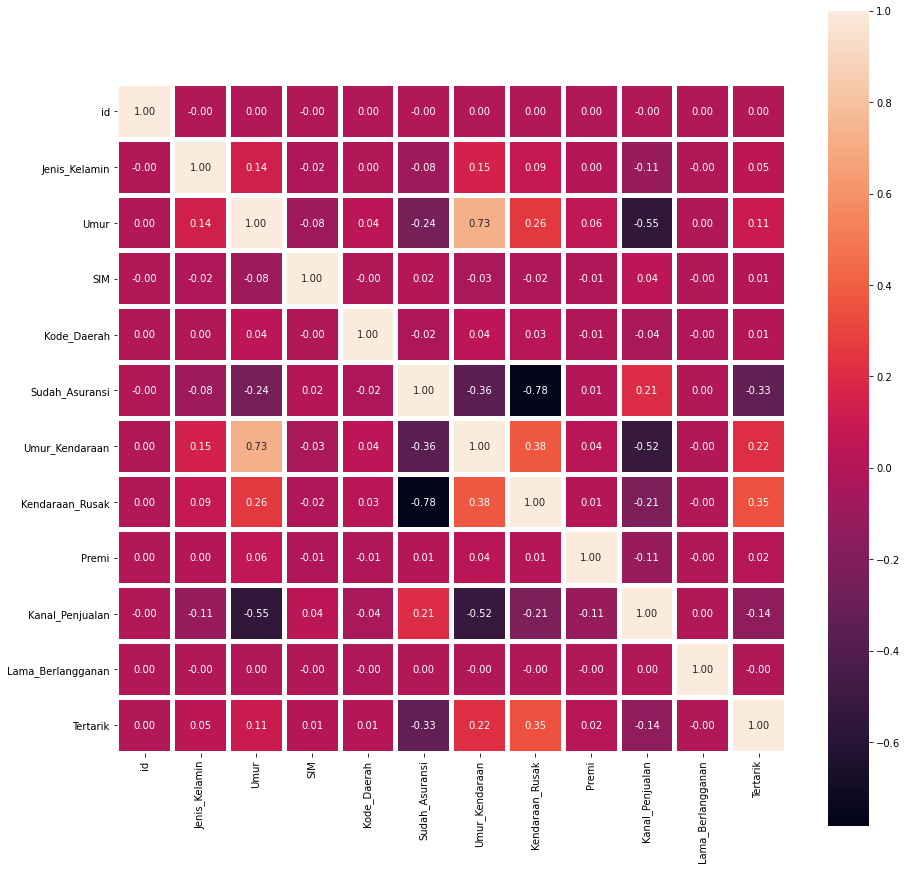

In [12]:
#Melakukan Cek Korelasi Antar Data 
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True, fmt ='.2f', linewidth=4, square=True)

###SPLIT DATASET

In [13]:
#Melakukan Split Dataset menggunakan import train_test_split
X_train = df_train.drop(['Tertarik'], axis=1)
y_train = df_train['Tertarik']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((228664, 11), (228664,), (57167, 11), (57167,))

In [16]:
#Import Skelarn
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

list_accuracy = []

###MODEL KN CLASSIFIER


In [17]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

list_accuracy.append(accuracy_score(y_test, y_pred_KNN))
print('Accuracy Score :',accuracy_score(y_test, y_pred_KNN))

Accuracy Score : 0.8569804257701121


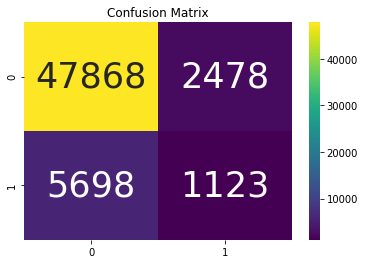

In [18]:
#Confussion Matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(data=cm_knn,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

In [19]:
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]

In [20]:
#Hitung Recall
recall_knn = TP_KNN / float(TP_KNN + FP_KNN)
recall_knn

0.9507805982600405

In [21]:
#Hitung Precision
precision_knn = TP_KNN / float(TP_KNN + FN_KNN)
precision_knn

0.8936265541574879

In [22]:
#Hitung F1
f1_knn = 2*precision_knn*recall_knn/(precision_knn+recall_knn)
print(f1_knn)

0.921318038340134


In [23]:
#Hitung menggunakan classification Report
cls_report_rf = classification_report(y_test, y_pred_KNN)
print(f'classification report: \n{cls_report_rf}')

classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     50346
         1.0       0.31      0.16      0.22      6821

    accuracy                           0.86     57167
   macro avg       0.60      0.56      0.57     57167
weighted avg       0.82      0.86      0.84     57167



# MODEL RANDOM FOREST CLASSIFIER

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

list_accuracy.append(accuracy_score(y_test, y_pred_RF))
print('Accuracy Score :',accuracy_score(y_test, y_pred_RF))

Accuracy Score : 0.8762572812986513


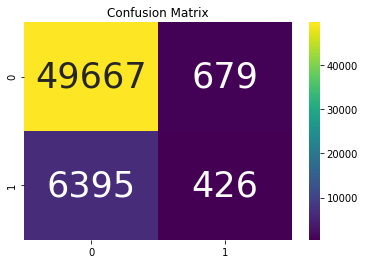

In [25]:
#Confussion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(data=cm_rf,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

In [26]:
TP_RF = cm_knn[0,0]
TN_RF = cm_knn[1,1]
FP_RF = cm_knn[0,1]
FN_RF = cm_knn[1,0]

In [27]:
recall_RF = TP_RF / float(TP_RF + FP_RF)
recall_RF

0.9507805982600405

In [28]:
precision_RF = TP_RF / float(TP_RF + FN_RF)
precision_RF

0.8936265541574879

In [29]:
f1_RF = 2*precision_RF*recall_RF/(precision_RF+recall_RF)
print(f1_RF)

0.921318038340134


In [30]:
#Hitung menggunakan classification Report
cls_report_rf = classification_report(y_test, y_pred_RF)
print(f'classification report: \n{cls_report_rf}')

classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93     50346
         1.0       0.39      0.06      0.11      6821

    accuracy                           0.88     57167
   macro avg       0.64      0.52      0.52     57167
weighted avg       0.83      0.88      0.83     57167



In [31]:
#Dataframe Hasil Prediksi menggunakan KN classifier
submission_KN =pd.DataFrame({'Tertarik':y_test, 'Prediksi':y_pred_KNN})
submission_KN.head()

,Tertarik,Prediksi
206768,0.0,1.0
9709,0.0,0.0
37163,0.0,0.0
145567,0.0,0.0
78584,1.0,0.0


In [32]:
#Dataframe hasil Prediksi menggunakan Random Forest
submission_RF =pd.DataFrame({'Tertarik':y_test, 'Prediksi':y_pred_RF})
submission_RF.head()

,Tertarik,Prediksi
206768,0.0,0.0
9709,0.0,0.0
37163,0.0,0.0
145567,0.0,0.0
78584,1.0,0.0


In [33]:
submission_KN.to_csv('DataOlahKNClass.csv', index=False)

In [34]:
submission_RF.to_csv('DataOlahRandomForestClass.csv', index=False)